### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

2. Investigate the dataset for missing or problematic data.

In [6]:

print(data.info())

print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
data = data.drop(['car'], axis=1)


In [8]:
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    data[column].fillna(data[column].mode()[0], inplace=True)


4. What proportion of the total observations chose to accept the coupon? 



In [9]:
proportion_accepted = data['Y'].sum() / len(data)
print(f'Proportion of total observations where the coupon was accepted: {proportion_accepted}')


Proportion of total observations where the coupon was accepted: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

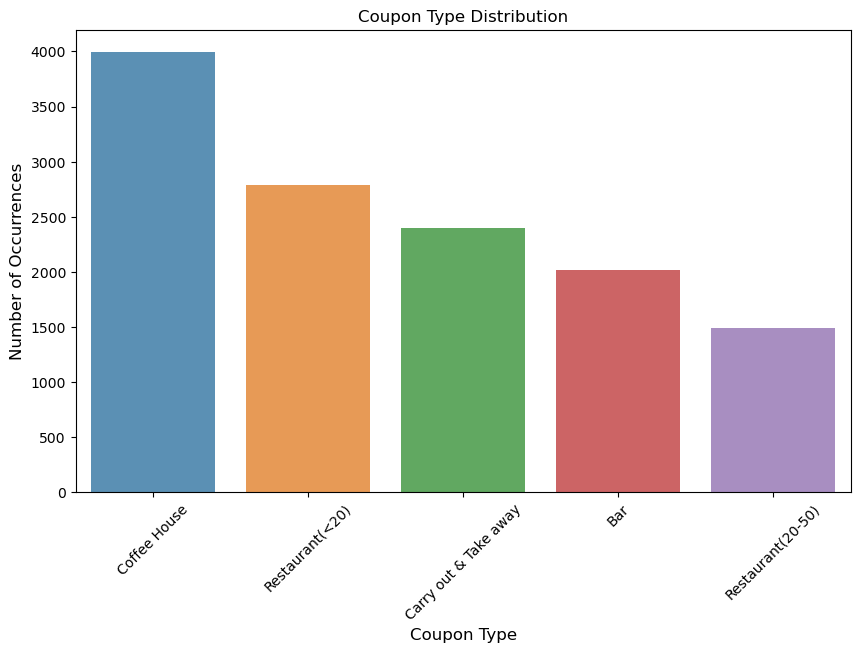

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

coupon_counts = data['coupon'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values, alpha=0.8)
plt.title('Coupon Type Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Coupon Type', fontsize=12)
plt.xticks(rotation=45)  
plt.show()


6. Use a histogram to visualize the temperature column.

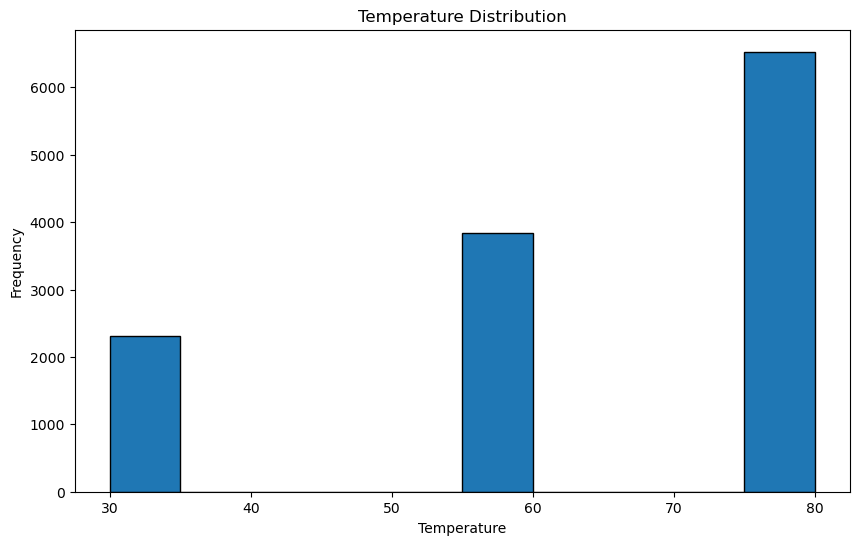

In [15]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
plt.hist(data['temperature'], edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
data.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [21]:
bar_coupons = data[data['coupon'] == 'Bar']


2. What proportion of bar coupons were accepted?


In [22]:
bar_coupons.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


In [23]:
proportion_accepted_bar = bar_coupons['Y'].sum() / len(bar_coupons)
print(f'Proportion of bar coupons that were accepted: {proportion_accepted_bar}')


Proportion of bar coupons that were accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:

less_frequent = data[data['Bar'].isin(['never', 'less than 1', '1~3'])]
more_frequent = data[data['Bar'].isin(['4~8', 'gt8'])]


acceptance_rate_less_frequent = less_frequent['Y'].mean()
acceptance_rate_more_frequent = more_frequent['Y'].mean()

print(f'Acceptance rate of those who went to a bar 3 or fewer times a month: {acceptance_rate_less_frequent}')
print(f'Acceptance rate of those who went to a bar more than 3 times a month: {acceptance_rate_more_frequent}')


Acceptance rate of those who went to a bar 3 or fewer times a month: 0.5606274913205607
Acceptance rate of those who went to a bar more than 3 times a month: 0.6224561403508772


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:

over_25 = ['26', '31', '36', '41', '46', '50plus']


freq_bar_goers_over_25 = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'].isin(over_25))]


all_others = data[~data.index.isin(freq_bar_goers_over_25.index)]


acceptance_rate_freq_bar_goers_over_25 = freq_bar_goers_over_25['Y'].mean()
acceptance_rate_all_others = all_others['Y'].mean()

print(f'Acceptance rate of frequent bar-goers over 25: {acceptance_rate_freq_bar_goers_over_25}')
print(f'Acceptance rate of all other participants: {acceptance_rate_all_others}')


Acceptance rate of frequent bar-goers over 25: 0.6215340295282679
Acceptance rate of all other participants: 0.5535479963662057


In [26]:
difference = acceptance_rate_freq_bar_goers_over_25 - acceptance_rate_all_others
print(f'Difference in acceptance rates: {difference}')


Difference in acceptance rates: 0.0679860331620622


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [27]:

mask_bar = data['Bar'].isin(['1~3', '4~8', 'gt8'])

mask_not_kids = data['passanger'] != 'kid(s)'

mask_not_fff = data['occupation'] != 'Farming, fishing, and forestry'

mask_all_conditions = mask_bar & mask_not_kids & mask_not_fff

acceptance_rate_conditions_met = data.loc[mask_all_conditions, 'Y'].mean()

acceptance_rate_others = data.loc[~mask_all_conditions, 'Y'].mean()

print(f"Acceptance rate for those who meet all conditions: {acceptance_rate_conditions_met}")
print(f"Acceptance rate for all others: {acceptance_rate_others}")

difference = acceptance_rate_conditions_met - acceptance_rate_others
print(f"Difference in acceptance rates: {difference}")


Acceptance rate for those who meet all conditions: 0.6221139045664443
Acceptance rate for all others: 0.5446164352378784
Difference in acceptance rates: 0.07749746932856594


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [28]:
age_categories = ['below21', '21', '26', '30']
income_categories = ['$12500 - $24999', '$25000 - $37499']

# Group 1
mask_bar_g1 = data['Bar'].isin(['1~3', '4~8', 'gt8'])
mask_not_kids_g1 = data['passanger'] != 'kid(s)'
mask_not_widowed_g1 = data['maritalStatus'] != 'Widowed'

# Group 2
mask_bar_g2 = data['Bar'].isin(['1~3', '4~8', 'gt8'])
mask_age_g2 = data['age'].isin(age_categories)

# Group 3
mask_cheap_restaurant_g3 = data['RestaurantLessThan20'].isin(['4~8', 'gt8'])
mask_income_g3 = data['income'].isin(income_categories)

mask_group1 = mask_bar_g1 & mask_not_kids_g1 & mask_not_widowed_g1
mask_group2 = mask_bar_g2 & mask_age_g2
mask_group3 = mask_cheap_restaurant_g3 & mask_income_g3

acceptance_rate_group1 = data.loc[mask_group1, 'Y'].mean()
acceptance_rate_group2 = data.loc[mask_group2, 'Y'].mean()
acceptance_rate_group3 = data.loc[mask_group3, 'Y'].mean()

print(f"Acceptance rate for Group 1: {acceptance_rate_group1}")
print(f"Acceptance rate for Group 2: {acceptance_rate_group2}")
print(f"Acceptance rate for Group 3: {acceptance_rate_group3}")


Acceptance rate for Group 1: 0.6221139045664443
Acceptance rate for Group 2: 0.628080985915493
Acceptance rate for Group 3: 0.5740103270223752


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who frequently visit bars, are young, do not have children as passengers, are not widowed, and frequently eat at cheaper restaurants with lower income, are more likely to accept bar coupons. These factors could indicate a tendency towards seeking deals or being more socially active.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [29]:
coffee_house_coupons = data[data['coupon'] == 'Coffee House']


In [33]:
coffee_acceptance_rate = coffee_house_coupons['Y'].mean()
coffee_acceptance_rate

0.49924924924924924

In [34]:
coffee_freq_acceptance = coffee_house_coupons.groupby('CoffeeHouse')['Y'].mean()
coffee_freq_acceptance

CoffeeHouse
1~3      0.647793
4~8      0.685874
gt8      0.657895
less1    0.480384
never    0.188781
Name: Y, dtype: float64

In [35]:
specific_group = coffee_house_coupons[(coffee_house_coupons['CoffeeHouse'] != 'never') & 
                                      (coffee_house_coupons['age'] != 'below21') & 
                                      (coffee_house_coupons['education'] == 'Bachelors degree')]
specific_group_acceptance_rate = specific_group['Y'].mean()
specific_group_acceptance_rate

0.5666991236611489

Based on the exploration of the "Coffee House" coupons:

1. Overall, approximately 50% of "Coffee House" coupons are accepted.

2. There is a noticeable difference in acceptance rates depending on how frequently the recipient visits a coffee house:

    - Individuals who never go to a coffee house have an acceptance rate of approximately 19%. 
    - For those who visit a coffee house less than once a month, the acceptance rate increases to 48%.
    - For those who visit a coffee house 1 to 3 times a month, the acceptance rate is even higher at around 65%. 
    - The trend continues with individuals who visit 4 to 8 times a month (acceptance rate of 69%) and even those who visit more than 8 times a month (acceptance rate of 66%).

3. Among a specific group of frequent coffee house visitors (more than once a month) who are also over the age of 21 and have a bachelor's degree, the acceptance rate is approximately 57%.

It's clear that frequent coffee house visitors are significantly more likely to accept a coffee house coupon compared to those who rarely or never visit coffee houses. Education and age also seem to play a role in coupon acceptance, with those over the age of 21 and holding a bachelor's degree being more likely to accept. This suggests that coffee house coupon marketing strategies could be most effective when targeted at frequent coffee house visitors, particularly those who are older and have higher levels of education.